In [49]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve
import itertools

In [50]:
#penguins data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [51]:
#dropping columns: studyName, Individual ID, Date Egg, Sample Number
pdata = penguins.drop(['studyName', 'Individual ID', 'Date Egg', 'Region', 'Sample Number', 'Comments'], axis = 1)

In [52]:
#drop nan values
mydata = pdata.dropna()

In [53]:
#get rid of penguin with period for sex
data = mydata[mydata['Sex'] != '.']

In [54]:
#transforming cols that are not floats and ints
le = preprocessing.LabelEncoder()

#species 
data['Species'] = le.fit_transform(data['Species'])
#island
data['Island'] = le.fit_transform(data['Island'])
#stage
data['Stage'] = le.fit_transform(data['Stage'])
#clutch competition
data['Clutch Completion'] = le.fit_transform(data['Clutch Completion'])
#sex
data['Sex'] = le.fit_transform(data['Sex'])

<ipython-input-54-94ee70b04ed6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = le.fit_transform(data['Species'])
<ipython-input-54-94ee70b04ed6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Island'] = le.fit_transform(data['Island'])
<ipython-input-54-94ee70b04ed6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [55]:
#making combos
categories = list(data.columns)[1:]
combos = list(itertools.combinations(categories, 3))

In [56]:
#splitting the data in test and training
train, test = train_test_split(data, test_size = 0.3)
train.shape, test.shape

((226, 11), (98, 11))

In [57]:
x_train = train.drop(['Species'], axis = 1)
y_train = train['Species'].values

x_test = test.drop(['Species'], axis = 1)
y_test = test['Species'].values

In [58]:
def check_column_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices
    """
    logreg = LogisticRegression(max_iter = 1000)
    return cross_val_score(logreg, x_train[cols], y_train, cv = 5).mean()

def test_column_score(tupCol):
    """
    Trains and evaluates a model on the test set using the columns of the data
    with selected indices
    """
    cols = list(tupCol)
    logreg = LogisticRegression(max_iter = 1000)
    logreg.fit(x_train[cols], y_train)
    return logreg.score(x_test[cols], y_test)

In [59]:
D = {}
for i in range(len(combos)): 
    cols = list(combos[i])
    x = check_column_score(cols)
    D[i] = x

In [60]:
D

{0: 0.6419323671497584,
 1: 0.9513043478260869,
 2: 0.7567149758454106,
 3: 0.7963285024154588,
 4: 0.7123671497584542,
 5: 0.6549758454106279,
 6: 0.7919806763285024,
 7: 0.8318840579710145,
 8: 0.942512077294686,
 9: 0.7303381642512077,
 10: 0.7921739130434782,
 11: 0.7567149758454106,
 12: 0.6419323671497584,
 13: 0.7788405797101449,
 14: 0.8231884057971014,
 15: 0.9735265700483092,
 16: 0.9646376811594202,
 17: 0.9600966183574879,
 18: 0.9735265700483092,
 19: 0.9646376811594204,
 20: 0.9557487922705314,
 21: 0.8141062801932366,
 22: 0.7877294685990337,
 23: 0.7789371980676328,
 24: 0.814009661835749,
 25: 0.9203864734299518,
 26: 0.7257004830917875,
 27: 0.8142028985507247,
 28: 0.8806763285024154,
 29: 0.9468599033816426,
 30: 0.729951690821256,
 31: 0.7609661835748792,
 32: 0.7610628019323671,
 33: 0.8007729468599034,
 34: 0.8230917874396135,
 35: 0.8980676328502415,
 36: 0.7655072463768116,
 37: 0.7215458937198067,
 38: 0.7967149758454106,
 39: 0.6952657004830918,
 40: 0.416135

In [72]:
L = list(D.items())
L.sort(key = lambda tup: tup[1], reverse = True)

best = L

for where, score in best:
    print("---- " + str(where))
    print(str(combos[where]) + ", Score: " + str(np.round(score, 5)))
    test_score = test_column_score(combos[where])
    print("Test score is: " + str(np.round(test_score, 5)))

---- 86
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)'), Score: 0.99565
Test score is: 0.9898
---- 89
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'), Score: 0.99556
Test score is: 1.0
---- 87
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'), Score: 0.99121
Test score is: 0.97959
---- 88
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'), Score: 0.98676
Test score is: 0.97959
---- 85
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'), Score: 0.98667
Test score is: 0.96939
---- 15
('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'), Score: 0.97353
Test score is: 0.97959
---- 18
('Island', 'Culmen Length (mm)', 'Sex'), Score: 0.97353
Test score is: 0.96939
---- 94
('Culmen Length (mm)', 'Body Mass (g)', 'Sex'), Score: 0.97353
Test score is: 0.96939
---- 99
('Culmen Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'), Score: 0.96908
Test score is: 0.94898
---- 98
('Culmen Length (mm)', 'Sex', 'Delta 13 C (o/oo)'), Score: 

Test score is: 0.77551
---- 13
('Island', 'Clutch Completion', 'Delta 15 N (o/oo)'), Score: 0.77884
Test score is: 0.76531
---- 51
('Stage', 'Culmen Depth (mm)', 'Sex'), Score: 0.77884
Test score is: 0.76531
---- 117
('Body Mass (g)', 'Sex', 'Delta 13 C (o/oo)'), Score: 0.77884
Test score is: 0.76531
---- 58
('Stage', 'Body Mass (g)', 'Sex'), Score: 0.77449
Test score is: 0.77551
---- 79
('Clutch Completion', 'Body Mass (g)', 'Sex'), Score: 0.77005
Test score is: 0.76531
---- 36
('Stage', 'Clutch Completion', 'Culmen Length (mm)'), Score: 0.76551
Test score is: 0.7551
---- 32
('Island', 'Body Mass (g)', 'Delta 13 C (o/oo)'), Score: 0.76106
Test score is: 0.7551
---- 31
('Island', 'Body Mass (g)', 'Delta 15 N (o/oo)'), Score: 0.76097
Test score is: 0.7551
---- 72
('Clutch Completion', 'Culmen Depth (mm)', 'Sex'), Score: 0.75691
Test score is: 0.76531
---- 2
('Island', 'Stage', 'Culmen Depth (mm)'), Score: 0.75671
Test score is: 0.7551
---- 11
('Island', 'Clutch Completion', 'Body Mass (

In [62]:
X_train = train[list(combos[89])]
X_test = test[list(combos[89])]

list(combos[89])

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']

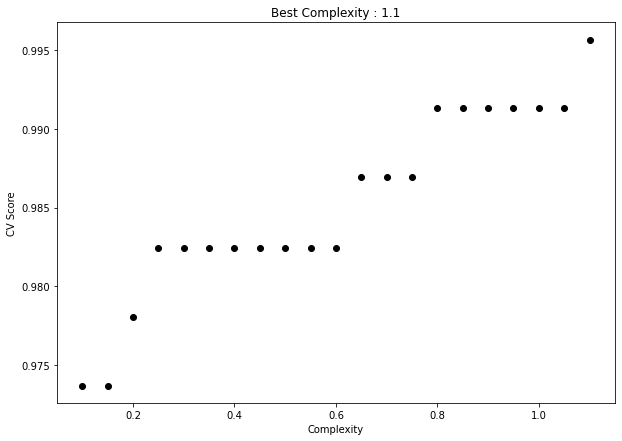

In [63]:
fig, ax = plt.subplots(1, figsize = (10, 7))
best_score = 0

#comp is short for complexity 
for comp in np.linspace(0.1, 1.1, 21):
    #range(1,30)
    logreg = LogisticRegression(max_iter = 1000, C = comp)
    cv_score = cross_val_score(logreg, X_train, y_train, cv=10).mean()
    ax.scatter(comp, cv_score, color = "black")
    
    if cv_score > best_score:
        best_comp = comp
        best_score = cv_score
    
    
l = ax.set(title = "Best Complexity : " + str(best_comp),
       xlabel = "Complexity", 
       ylabel = "CV Score")

In [64]:
best_comp

1.1

In [65]:
lr = LogisticRegression(max_iter = 1000, C = best_comp)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0